## Gán giá trị ở cuối phân phối

Trong notebook trước, chúng ta đã thay thế dữ liệu bị khuyết bằng một giá trị bất kỳ. Tuy nhiên, việc xác định giá trị bất kỳ tốn nhiều công sức và thường thực hiện thủ công. Chúng ta có thể tự động hóa quá trình này bằng cách tự động chọn các giá trị bất kỳ ở cuối phân phối của biến.

#### Làm cách nào để chọn giá trị ở cuối?

- Nếu biến được phân phối chuẩn, chúng ta có thể sử dụng mean +/- 3*std.
- Nếu biến bị lệch, chúng ta có thể sử dụng quy tắc tiệm cận IQR.

Chúng ta đã học các kỹ thuật này ở bài giảng về Outlier.

- Chúng ta cũng có thể chọn giá trị min/max và nhân với một số lần nhất định, chẳng hạn như 2 hoặc 3.


### Những biến nào có thể gán giá trị ở cuối phân phối?

Phương pháp này phù hợp với cả biến dạng số và biến hạng mục.

### Giả định

- MNAR - các giá trị không khuyết ngẫu nhiên.

Nếu giá trị không bị khuyết ngẫu nhiên thì chúng ta không thay thế nó cho mean/median, làm cho quan sát đó giống như phần lớn các quan sát khác. Thay vào đó, chúng ta gắn cờ quan sát đó là khác và gán một giá trị nằm ở cuối phân phối, nơi các quan sát hiếm khi được biểu diễn trong tập hợp.


### Ưu điểm

- Dễ thực hiện.
- Cách nhanh chóng để có được tập dữ liệu hoàn chỉnh.
- Có thể tích hợp trong sản xuất (trong quá trình triển khai mô hình).
- Nắm bắt được tầm quan trọng của "khuyết" nếu có.

### Hạn chế

- Làm biến dạng phân phối biến ban đầu.
- Làm biến dạng phương sai ban đầu.
- Làm biến dạng hiệp phương sai với các biến còn lại của tập dữ liệu.
- Kỹ thuật này có thể che giấu các outlier thực trong phân phối.


### Lưu ý cuối cùng

Phương pháp này được sử dụng trong các cuộc thi dữ liệu, tuy nhiên, nó lại được sử dụng ở các công ty tài chính. Khi nắm bắt lịch sử tài chính của khách hàng, dữ liệu bị khuyết được thay thế bằng một giá trị ở cuối phân phối để không cho rằng nó bị khuyết ngẫu nhiên.

Xem [phát biểu tại PyData London năm 2017](https://www.youtube.com/watch?v=KHGGlozsRtA) là ví dụ về Feature Engineering trong lĩnh vực Tài chính.

## Trong bản mô phỏng này:

Chúng ta sẽ học cách thực hiện gán giá trị ở cuối phân phối sử dụng pandas trên tập dữ liệu Ames House Price và Titanic.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# chia các tập dữ liệu
from sklearn.model_selection import train_test_split

In [2]:
# load tập dữ liệu titanic với một số biến để trình bày

data = pd.read_csv('titanic.csv', usecols=['age', 'fare', 'survived'])
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [3]:
# xem phần trăm của NA

data.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

### Gán quan trọng

Việc gán phải được thực hiện trong tập huấn luyện, sau đó được truyền sang tập kiểm tra. Với kỹ thuật gán này, chúng ta sẽ chọn giá trị mà khi thay thế NA, chỉ cần nhìn vào phân phối của các biến trong tập huấn luyện và kiểm tra, sau đó sử dụng các giá trị được chọn để thay NA trong cả tập huấn luyện và kiểm tra.

In [4]:
# hãy chia thành tập huấn luyện và tập kiểm tra

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],  # các yếu tố dự báo
    data['survived'],  # mục tiêu
    test_size=0.3,  # phần trăm các quan sát trong tập kiểm tra
    random_state=0)  # seed đảm bảo khả năng tái lặp

X_train.shape, X_test.shape

((916, 2), (393, 2))

<AxesSubplot: >

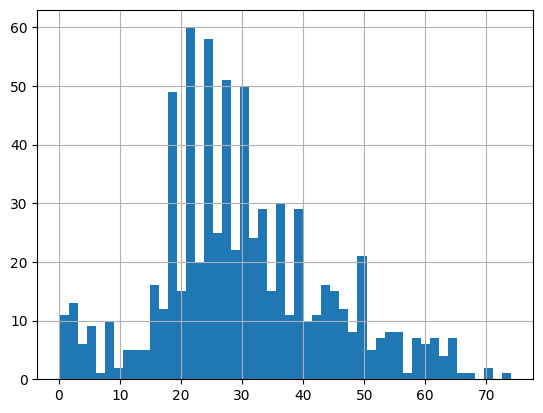

In [5]:
# xem phân phối của Age
X_train.age.hist(bins=50)

In [6]:
## Yêu cầu 1
# tạo một hàm điền các giá trị bị khuyết với giá trị cực trị:
# các biến nhận dataframe, biến và giá trị để thay thế na
# và trả về biến với na đã điền

def impute_na(df, variable, value):
    ## VIẾT CODE Ở ĐÂY:
    df[variable].fillna(value,inplace=True)
    return df

<details><summary> Gợi ý </summary>

[fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

</details>

In [7]:
## Yêu cầu 2: đầu của phân phối:

# Do Age trông xấp xỉ Gauss, sử dụng
# mean và std để tính giá trị thay thế

## VIẾT CODE Ở ĐÂY:
valu = X_train['age'].mean() + 3*X_train['age'].std()
valu

72.03416424092518

<details><summary> Gợi ý </summary>

sử dụng công thức: mean(X) + 3*std(X)

[mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)

[std()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html)

</details>

In [8]:
## Yêu cầu 3: thay NA với giá trị đã tính ở trên

## VIẾT CODE Ở ĐÂY:
X_train['Age_imputed'] = X_train['age']
impute_na(X_train,'Age_imputed', valu)

X_train.head(15)

,age,fare,Age_imputed
501,13.0,19.5000,13.000000
588,4.0,23.0000,4.000000
402,30.0,13.8583,30.000000
1193,NaN,7.7250,72.034164
686,22.0,7.7250,22.000000
971,NaN,7.8792,72.034164
117,30.0,56.9292,30.000000
540,2.0,26.0000,2.000000
294,49.0,110.8833,49.000000
261,35.0,26.2875,35.000000


Hãy xem các hàng có dữ liệu bị khuyết (NaN) trong Age và cách chúng được thay thế bằng 73.436 trong biến mới như thế nào.

In [9]:
# chúng ta thấy phương sai thay đổi sau khi gán giá trị ở cuối phân phối
# điều này được dự tính vì phần trăm dữ liệu bị khuyết khá
# cao ở Age, ~20%

print('Original variable variance: ', X_train['age'].var())
print('Variance after 99 imputation: ', X_train['Age_imputed'].var())

Original variable variance:  194.16304666581863
Variance after 99 imputation:  427.39198372523526


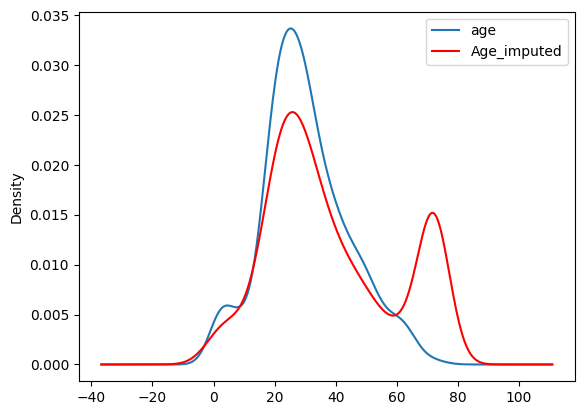

In [10]:
# chúng ta thấy các phân phối đã thay đổi
# với nhiều giá trị hơn tích lũy hướng tới các đuôi

fig = plt.figure()
ax = fig.add_subplot(111)

# phân phối ban đầu của biến
X_train['age'].plot(kind='kde', ax=ax)

# biến được gán
X_train['Age_imputed'].plot(kind='kde', ax=ax, color='red')

# thêm legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Như đã đề cập ở trên, tương tự như gán giá trị bất kỳ, gán giá trị ở cuối phân phối làm sai lệch phân phối ban đầu của biến Age. Biến đã chuyển đổi hiển thị nhiều giá trị hơn xung quanh giá trị ở đuôi đã chọn.

**Điều này quan trọng không?**

Còn tùy thuộc vào mô hình học máy mà chúng ta muốn xây dựng. Mô hình tuyến tính giả định rằng các biến được phân phối chuẩn. Việc gán các giá trị ở cuối phân phối có thể làm sai lệch phân phối chuẩn ban đầu nếu % dữ liệu bị khuyết cao. Do đó, biến được gán cuối cùng sẽ không được phân phối chuẩn nữa, nên có thể ảnh hưởng đến chất lượng của mô hình tuyến tính.

Mặt khác, kỹ thuật này hoạt động khá tốt với các thuật toán cây.

In [12]:
# chúng ta cũng nói rằng gán giá trị ở cuối phân phối có thể ảnh hưởng tới mối quan hệ
# ới các biến khác trong tập dữ liệu, hãy quan sát

X_train[['fare', 'age', 'Age_imputed']].cov()

,fare,age,Age_imputed
fare,2248.326729,136.176223,19.647139
age,136.176223,194.163047,194.163047
Age_imputed,19.647139,194.163047,427.391984


Chúng ta thấy hiệp phương sai giữa Age và Fare cũng thay đổi sau khi gán giá trị ở cuối phân phối.

<AxesSubplot: >

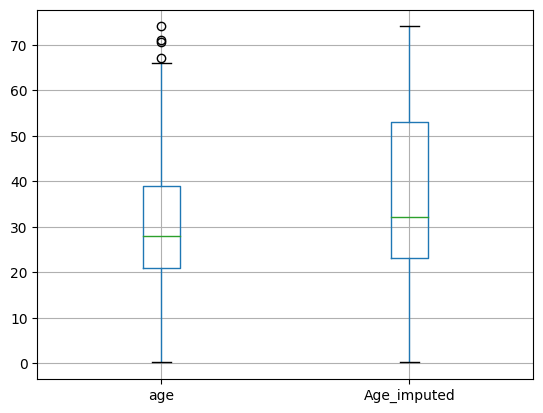

In [13]:
# Cuối cùng, gán giá ở cuối phân phối có thể 
# ảnh hưởng tới nhận thức outlier

# Hãy tìm hiểu điều này sử dụng biểu đồ hộp
X_train[['age', 'Age_imputed']].boxplot()

Che các outlier!!

## Tập dữ liệu giá nhà

Tập dữ liệu này có các biến có nhiều hoặc ít dữ liệu bị khuyết. Do đó, chúng ta có thể so sánh ảnh hưởng của gán giá trị ở cuối phân phối trong cả hai trường hợp.

In [14]:
# chúng ta sẽ chỉ sử dụng các biến sau,
# 3 trong số đó chứa NA

cols_to_use = [
    'OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'WoodDeckSF',
    'BsmtUnfSF', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'SalePrice'
]

In [15]:
# load tập dữ liệu giá nhà

data = pd.read_csv('houseprice.csv', usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [16]:
# trong list tiếp theo, lặp qua tất cả các cột có trong list
# của tập dữ liệu và lựa chọn các cột chứa dữ liệu bị khuyết

[var for var in data.columns if data[var].isnull().sum()>0]

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [17]:
# tìm phần trăm dữ liệu bị khuyết trong các biến đó
# code tương tự như đã học ở phần đặc điểm của biến

data[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

In [18]:
# hãy chia thành tập huấn luyện và tập kiểm tra

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 10), (438, 10))

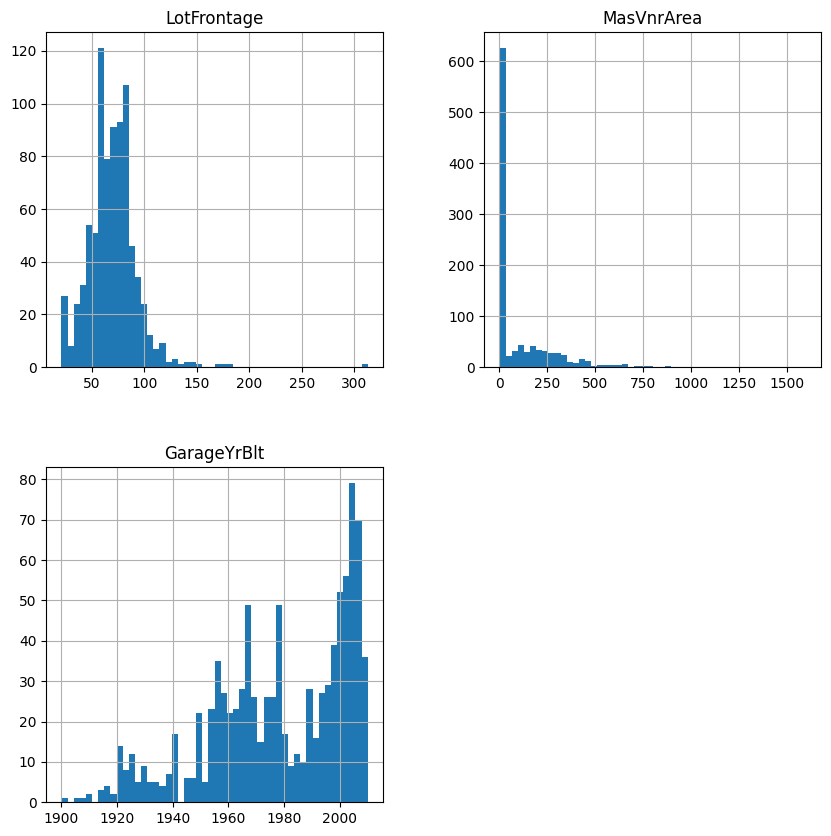

In [19]:
# vẽ biểu đồ phân bố của các biến
# chúng ta đã học code này ở phần các đặc điểm của biến

X_train[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']].hist(bins=50, figsize=(10,10))
plt.show()

      LotFrontage  OverallQual  MasVnrArea  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
64            NaN            7       573.0        318         1057      1057   
682           NaN            6         0.0        288         1291      1291   
960          50.0            5         0.0        162          858       858   
1384         60.0            6         0.0        356          560       698   
1100         60.0            2         0.0          0          290       438   
...           ...          ...         ...        ...          ...       ...   
763          82.0            8       673.0         89         1252      1268   
835          60.0            4         0.0        625         1067      1067   
1216         68.0            6         0.0          0            0      1318   
559           NaN            7        18.0       1374         1374      1557   
684          58.0            7        30.0       1195         1195      1195   

      GrLivArea  GarageYrBlt  WoodDeckS

In [43]:
## Yêu cầu 4: các biến không được phân phối chuẩn

# gán NA sử dụng quy tắc tiệm cận IQR mà chúng ta đã học
# trong bài giảng về outlier

cols = 'LotFrontage'

# tính IQR
## VIẾT CODE Ở ĐÂY:
IQR = X_train[cols].quantile(0.75) - X_train[cols].quantile(0.25)

# tính giới hạn trên
## VIẾT CODE Ở ĐÂY:
extreme_value = X_train[cols].quantile(0.75) + IQR*1.5
extreme_value

113.0

<details><summary> Gợi ý </summary>

IQR = third_quartile - first_quartile

extreme_value = third_quartile + 3*IQR

[quantile()](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.quantile.html)

</details>

In [46]:
## Yêu cầu 5: gán NA với giá trị cực trị

## VIẾT CODE Ở ĐÂY:
X_train['LotFrontage_imputed'] = X_train['LotFrontage']
impute_na(X_train, 'LotFrontage_imputed', extreme_value)
X_test['LotFrontage_imputed'] = X_test['LotFrontage']
impute_na(X_test, 'LotFrontage_imputed', extreme_value)

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice,LotFrontage_imputed
529,NaN,6,NaN,816,2035,2515,2515,1975.0,0,200624,113.0
491,79.0,6,0.0,238,806,958,1578,1941.0,0,133000,79.0
459,NaN,5,161.0,524,709,979,1203,1950.0,0,110000,113.0
279,83.0,7,299.0,768,1160,1156,2022,1977.0,288,192000,83.0
655,21.0,6,381.0,525,525,525,1092,1971.0,0,88000,21.0
...,...,...,...,...,...,...,...,...,...,...,...
271,73.0,7,0.0,96,1385,1363,1363,1954.0,81,241500,73.0
445,73.0,6,0.0,1436,1436,1689,1689,1956.0,0,127500,73.0
654,91.0,8,660.0,413,2109,2113,2113,1995.0,236,350000,91.0
1280,67.0,7,110.0,785,1573,1573,1573,2002.0,0,227000,67.0


In [49]:
## Yêu cầu 6: thực hiện tương tự cho MasVnrArea

col = 'MasVnrArea'
# tính IQR
## VIẾT CODE Ở ĐÂY:
IQR = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)

# tính giới hạn trên
## VIẾT CODE Ở ĐÂY:
extreme_value = X_train[col].quantile(0.75) + IQR*1.5

extreme_value

425.0

In [50]:
## Yêu cầu 7: gán NA với giá trị cực trị

## VIẾT CODE Ở ĐÂY:
X_train['MasVnrArea_imputed'] = X_train['MasVnrArea']
impute_na(X_train, 'MasVnrArea_imputed', extreme_value)
X_test['MasVnrArea_imputed'] = X_test['MasVnrArea']
impute_na(X_test, 'MasVnrArea_imputed', extreme_value)

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice,LotFrontage_imputed,MasVnrArea_imputed
529,NaN,6,NaN,816,2035,2515,2515,1975.0,0,200624,113.0,425.0
491,79.0,6,0.0,238,806,958,1578,1941.0,0,133000,79.0,0.0
459,NaN,5,161.0,524,709,979,1203,1950.0,0,110000,113.0,161.0
279,83.0,7,299.0,768,1160,1156,2022,1977.0,288,192000,83.0,299.0
655,21.0,6,381.0,525,525,525,1092,1971.0,0,88000,21.0,381.0
...,...,...,...,...,...,...,...,...,...,...,...,...
271,73.0,7,0.0,96,1385,1363,1363,1954.0,81,241500,73.0,0.0
445,73.0,6,0.0,1436,1436,1689,1689,1956.0,0,127500,73.0,0.0
654,91.0,8,660.0,413,2109,2113,2113,1995.0,236,350000,91.0,660.0
1280,67.0,7,110.0,785,1573,1573,1573,2002.0,0,227000,67.0,110.0


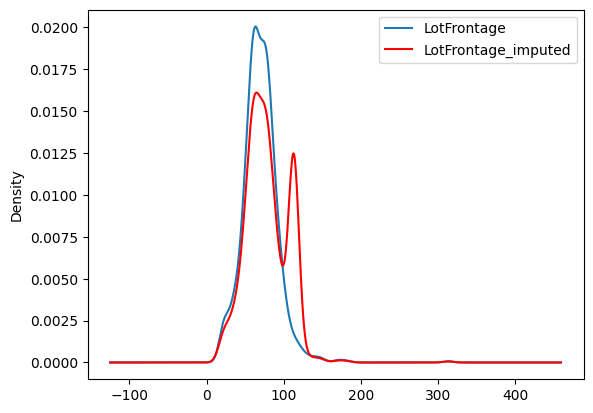

In [51]:
# đánh giá tác động của gán giá trị ở cuối phân phối với phân phối

# có thể thấy phân phối cho LotFrontAge đã thay đổi
# với nhiều giá trị hơn tích lũy hướng tới giá trị cực trị

fig = plt.figure()
ax = fig.add_subplot(111)

# phân phối ban đầu của biến
X_train['LotFrontage'].plot(kind='kde', ax=ax)

# biến được gán
X_train['LotFrontage_imputed'].plot(kind='kde', ax=ax, color='red')

# thêm legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

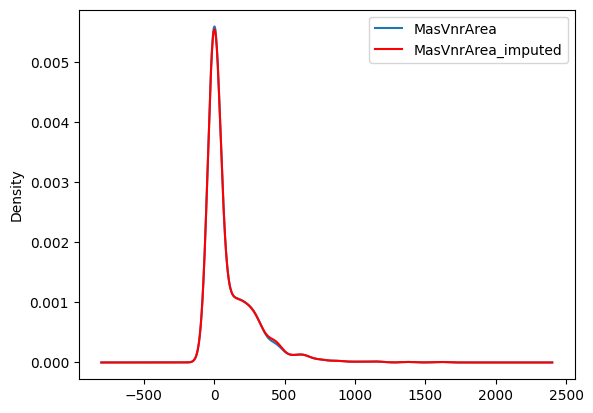

In [52]:
# đánh giá tác động của gán giá trị ở cuối phân phối với phân phối

# MasVnrArea chỉ có một vài outlier nên thay đổi trong phân phối
# không lớn. Ít hơn so với khi sử dụng giá bất kỳ 2999 khi
# chúng ta làm trong notebook trước

fig = plt.figure()
ax = fig.add_subplot(111)

# phân phối ban đầu của biến
X_train['MasVnrArea'].plot(kind='kde', ax=ax)

# biến được gán
X_train['MasVnrArea_imputed'].plot(kind='kde', ax=ax, color='red')

# thêm legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Từ các biểu đồ trên, chúng ta có thể thấy phân phối của LotFrontAge thay đổi khá nhiều, nhiều hơn thay đổi phân phối của MasVnrArea do % giá trị bị khuyết trong biến thứ hai khá nhỏ.

<AxesSubplot: >

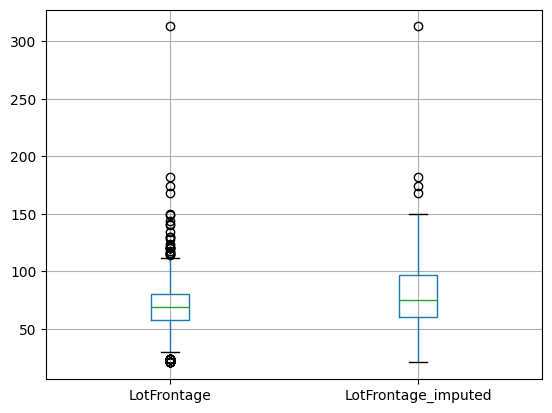

In [53]:
# chúng ta thấy có ít outlier hơn sau khi gán

X_train[['LotFrontage', 'LotFrontage_imputed']].boxplot()

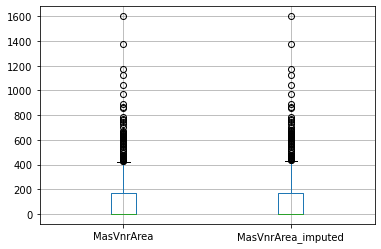

In [ ]:
# tuy nhiên, các outlier không bị ảnh hưởng nhiều với MasVnrArea

X_train[['MasVnrArea', 'MasVnrArea_imputed']].boxplot()

In [54]:
# tương tự, chúng ta có thể khám phá tác động của kỹ thuật gán tới
# phương sai

# thấy phương sai thay đổi sau khi gán cho LotFrontAgec
# điều này đã được dự kiến, do phần trăm dữ liệu bị khuyết khá
# cao, ~20%

print('Original Variance: ', X_train['LotFrontage'].var())
print('Variance after imputation: ', X_train['LotFrontage_imputed'].var())

Original Variance:  532.5872021885677
Variance after imputation:  717.2905472360278


In [55]:
# tương tự với MasnVnrArea, thay đổi không quá lớn
# Đặc biệt là ảnh hưởng này nhỏ hơn với cái mà chúng ta đã quan sát
# khi gán với 2999 trong notebook trước!!!

print('Original Variance: ', X_train['MasVnrArea'].var())
print('Variance after imputation: ', X_train['MasVnrArea_imputed'].var())

Original Variance:  32983.53871003956
Variance after imputation:  33325.550163781714


In [56]:
# cuối cùng, hãy khám phá hiệp phương sai:
# dành chút thời gian so sánh các giá trị trong bảng dưới đây.

X_train.cov()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice,LotFrontage_imputed,MasVnrArea_imputed
LotFrontage,532.587202,6.587119,6.805603e+02,9.496573e+02,2.908856e+03,3.379794e+03,3.919952e+03,30.611717,1.347414e+02,6.689645e+05,532.587202,6.863382e+02
OverallQual,6.587119,1.843859,1.014970e+02,1.746147e+02,2.886241e+02,2.242973e+02,4.091242e+02,17.902809,3.168557e+01,8.320132e+04,4.265189,1.024493e+02
MasVnrArea,680.560330,101.496976,3.298354e+04,7.540788e+03,2.478877e+04,2.086595e+04,3.520785e+04,1203.583792,3.208924e+03,6.836439e+06,602.595232,3.298354e+04
BsmtUnfSF,949.657293,174.614725,7.540788e+03,1.875241e+05,7.513307e+04,4.987449e+04,5.203392e+04,1823.065167,-1.833201e+03,6.833028e+06,-148.381532,7.602415e+03
TotalBsmtSF,2908.855504,288.624075,2.478877e+04,7.513307e+04,1.682931e+05,1.212079e+05,8.615192e+04,3173.042442,1.227966e+04,2.003928e+07,2335.422742,2.470776e+04
1stFlrSF,3379.793504,224.297266,2.086595e+04,4.987449e+04,1.212079e+05,1.398656e+05,1.044401e+05,2009.195552,1.109406e+04,1.783631e+07,2974.734267,2.064709e+04
GrLivArea,3919.951834,409.124216,3.520785e+04,5.203392e+04,8.615192e+04,1.044401e+05,2.681277e+05,2738.982988,1.558395e+04,2.934477e+07,3494.579666,3.524741e+04
GarageYrBlt,30.611717,17.902809,1.203584e+03,1.823065e+03,3.173042e+03,2.009196e+03,2.738983e+03,624.305948,6.658911e+02,9.309355e+05,25.743421,1.240221e+03
WoodDeckSF,134.741376,31.685571,3.208924e+03,-1.833201e+03,1.227966e+04,1.109406e+04,1.558395e+04,665.891118,1.648582e+04,3.029981e+06,355.396652,3.134568e+03
SalePrice,668964.454191,83201.317781,6.836439e+06,6.833028e+06,2.003928e+07,1.783631e+07,2.934477e+07,930935.489321,3.029981e+06,6.105731e+09,564042.950453,6.841816e+06
